<a href="https://colab.research.google.com/github/jack13johnson/MathDataSci_Fall23/blob/main/Hahn_AI_2023_Autoencoder_and_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
!pip install wandb
import wandb as wb

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y


## MNIST
    

### Load Data

In [ ]:
# #MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set  = MNIST('./data', train=False, download=True)

#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True)
test_set =  FashionMNIST('./data', train=False, download=True)

100%|██████████| 26421880/26421880 [00:03<00:00, 8345773.41it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 143499.52it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2658696.74it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19611514.07it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

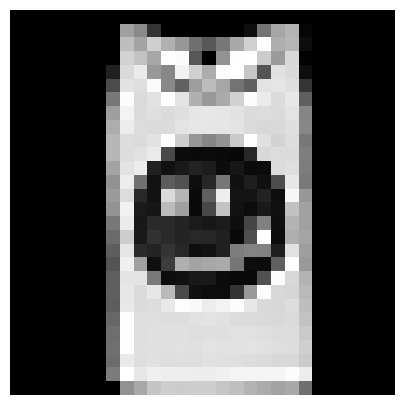

In [ ]:
plot(X[101,0,:,:])

In [ ]:
Y[100]

8

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

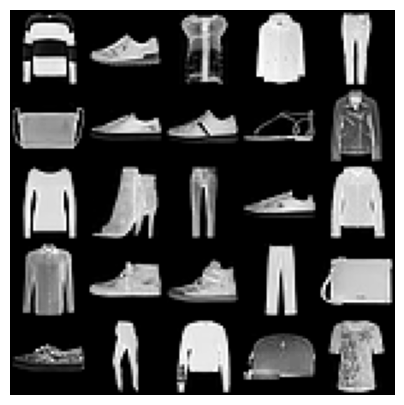

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)


### Classifier


In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

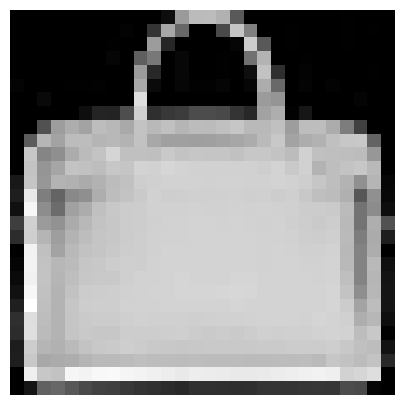

In [ ]:
plot(x[0].reshape(28,28))

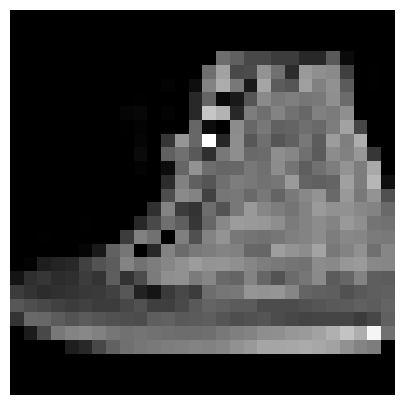

In [ ]:
plot(x[1].reshape(28,28))

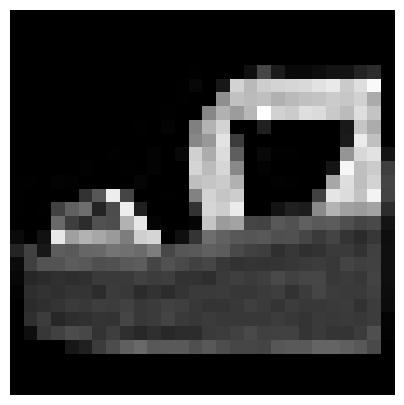

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y[:10]

tensor([8., 7., 5., 9., 3., 5., 9., 2., 4., 7.], device='cuda:0')

In [ ]:
W = GPU(np.random.randn(784,10))

In [ ]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

21.3 µs ± 688 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
x@W

tensor([[  0.2889,   7.7481, -11.2680,  ..., -36.2025,  32.8207,  -5.6953],
        [ -2.3436,   8.2857, -10.2075,  ..., -16.7770,   6.7520,  -5.9934],
        [ -1.6225,   4.1373,   3.1158,  ...,  -3.1171,  11.1019,  -4.1859],
        ...,
        [  7.0831,  11.6924,   3.1215,  ..., -10.5300,   6.6747,  -2.3035],
        [-11.1850,  12.0950,  -7.8895,  ..., -28.0879,  25.7310,  -4.2012],
        [  2.8233,  13.1918,  -3.0735,  ..., -14.6132,   7.6794,  -3.1179]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W

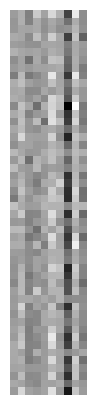

In [ ]:
plot(y2[:50])

In [ ]:
y

tensor([8., 7., 5., 9., 3., 5., 9., 2., 4., 7., 1., 8., 2., 0., 8., 3., 8., 2.,
        7., 9., 5., 3., 0., 2., 2., 7., 0., 0., 1., 0., 8., 1., 4., 4., 9., 6.,
        9., 5., 7., 3., 1., 6., 0., 0., 5., 0., 2., 0., 1., 8., 2., 3., 2., 5.,
        3., 1., 8., 4., 5., 6., 8., 2., 1., 3., 8., 6., 0., 4., 7., 5., 8., 4.,
        7., 6., 1., 3., 9., 1., 2., 0., 8., 6., 0., 9., 8., 8., 6., 5., 4., 8.,
        5., 1., 2., 4., 3., 3., 9., 9., 0., 0., 8., 3., 8., 0., 6., 5., 7., 2.,
        5., 1., 2., 7., 0., 6., 8., 4., 5., 2., 0., 7., 2., 0., 0., 9., 9., 3.,
        2., 6., 9., 3., 3., 7., 8., 7., 3., 8., 4., 5., 1., 1., 5., 4., 4., 5.,
        3., 0., 8., 2., 7., 2., 2., 3., 1., 3., 8., 7., 0., 8., 0., 9., 8., 2.,
        2., 1., 6., 7., 1., 9., 4., 0., 5., 7., 0., 5., 9., 5., 7., 0., 7., 1.,
        7., 5., 8., 4., 6., 0., 3., 1., 4., 1., 1., 8., 4., 2., 4., 0., 3., 5.,
        6., 2., 9., 6., 7., 4., 9., 5., 2., 2., 6., 7., 3., 9., 6., 4., 4., 7.,
        8., 5., 0., 9., 6., 0., 0., 9., 

In [ ]:
y.shape

torch.Size([1000])

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
one_hot(y)

<ipython-input-18-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
torch.argmax(y2,1)

tensor([8, 1, 8, 5, 8, 0, 5, 8, 8, 5, 1, 5, 8, 5, 5, 1, 1, 8, 5, 5, 0, 5, 6, 8,
        8, 0, 5, 5, 1, 5, 8, 5, 5, 5, 8, 5, 3, 6, 1, 1, 5, 5, 5, 5, 3, 5, 8, 5,
        6, 5, 8, 8, 8, 8, 6, 8, 8, 8, 3, 5, 8, 8, 1, 8, 1, 5, 5, 5, 9, 1, 8, 8,
        1, 5, 1, 8, 5, 6, 5, 5, 5, 5, 5, 5, 5, 8, 6, 5, 5, 8, 1, 8, 5, 5, 8, 8,
        5, 5, 8, 5, 5, 8, 1, 5, 5, 0, 8, 5, 1, 0, 8, 2, 5, 8, 8, 8, 1, 6, 8, 8,
        8, 5, 5, 3, 1, 8, 5, 8, 1, 8, 5, 3, 8, 1, 8, 8, 8, 3, 1, 1, 3, 5, 8, 8,
        6, 5, 5, 5, 5, 5, 5, 8, 6, 6, 5, 8, 5, 8, 5, 5, 5, 6, 5, 5, 5, 1, 5, 1,
        5, 5, 6, 0, 5, 8, 5, 6, 1, 5, 8, 1, 8, 8, 5, 5, 5, 5, 8, 8, 5, 6, 1, 8,
        5, 8, 8, 5, 8, 5, 8, 5, 8, 8, 1, 8, 0, 5, 5, 5, 5, 5, 8, 5, 8, 8, 8, 8,
        0, 0, 5, 0, 8, 5, 5, 5, 3, 6, 8, 5, 8, 5, 8, 5, 8, 3, 8, 5, 5, 1, 8, 6,
        1, 5, 0, 8, 1, 3, 8, 6, 5, 5, 1, 8, 5, 5, 1, 5, 1, 3, 5, 8, 8, 8, 5, 2,
        5, 0, 5, 8, 0, 5, 6, 5, 5, 3, 5, 3, 8, 5, 5, 5, 8, 6, 8, 5, 5, 5, 8, 5,
        5, 6, 8, 5, 5, 5, 8, 8, 6, 5, 8,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0760, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[ -1.7780,   8.3256, -10.9435,  ..., -32.3668,  16.8837, -10.0917],
        [  5.6904,  15.9204, -11.0551,  ..., -43.1562,  16.2479, -12.7885],
        [  1.4204,   5.1511,  -5.0832,  ..., -15.1496,   2.6288,  -3.9594],
        ...,
        [  2.2752,   6.8802,  -0.5635,  ..., -36.4700,  12.7067,  -8.0012],
        [ -0.1421,   3.1618,  -6.4367,  ..., -19.0612,   6.2528,  -1.4029],
        [ -5.0840,   3.7942,  -0.1042,  ...,  -3.6163,   2.1584,  -1.7542]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([5, 5, 6,  ..., 8, 5, 4], device='cuda:0')

In [ ]:
Y

tensor([9., 0., 0.,  ..., 3., 0., 5.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0954, device='cuda:0')

In [ ]:
X@W

tensor([[ -1.7780,   8.3256, -10.9435,  ..., -32.3668,  16.8837, -10.0917],
        [  5.6904,  15.9204, -11.0551,  ..., -43.1562,  16.2479, -12.7885],
        [  1.4204,   5.1511,  -5.0832,  ..., -15.1496,   2.6288,  -3.9594],
        ...,
        [  2.2752,   6.8802,  -0.5635,  ..., -36.4700,  12.7067,  -8.0012],
        [ -0.1421,   3.1618,  -6.4367,  ..., -19.0612,   6.2528,  -1.4029],
        [ -5.0840,   3.7942,  -0.1042,  ...,  -3.6163,   2.1584,  -1.7542]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

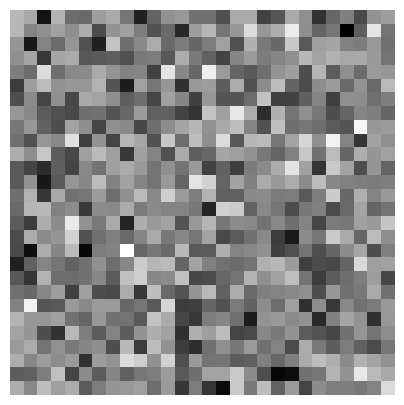

In [ ]:
plot(W[:,0].reshape(28,28))

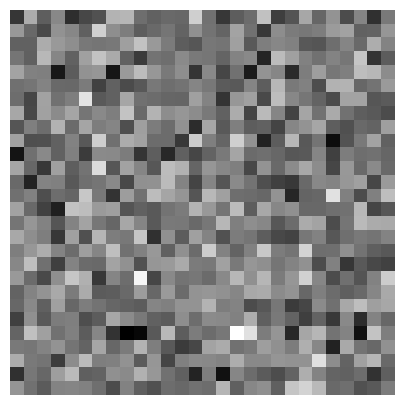

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

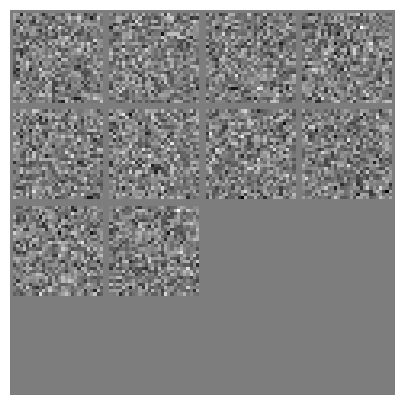

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data

    w[0].grad.data.zero_()

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_SGD_23");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()

        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

<ipython-input-18-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


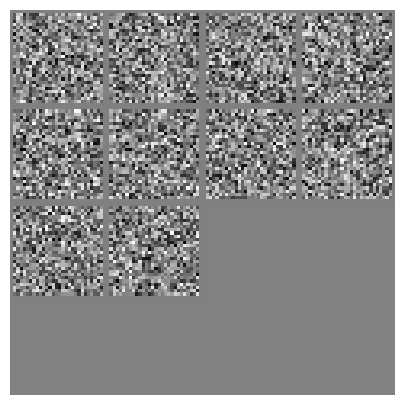

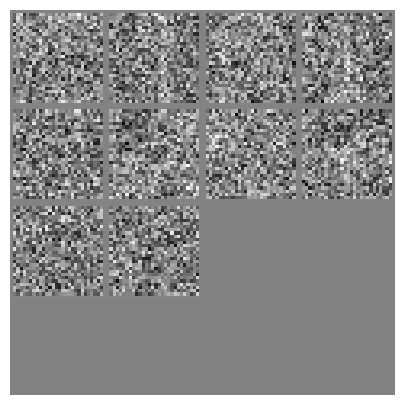

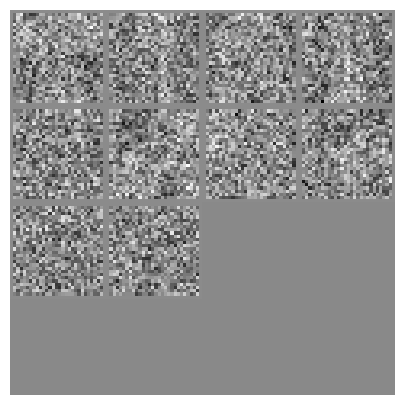

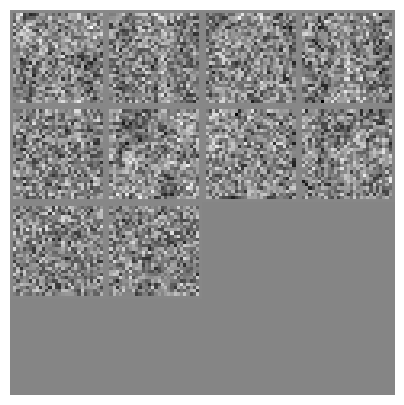

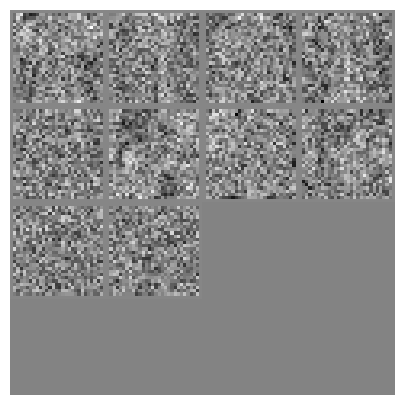

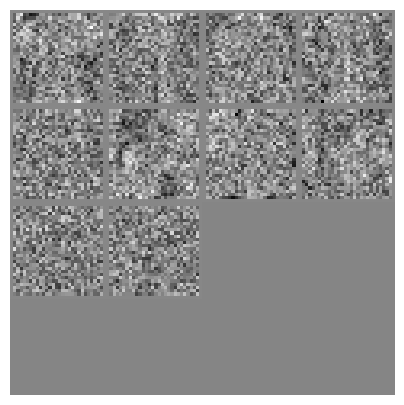

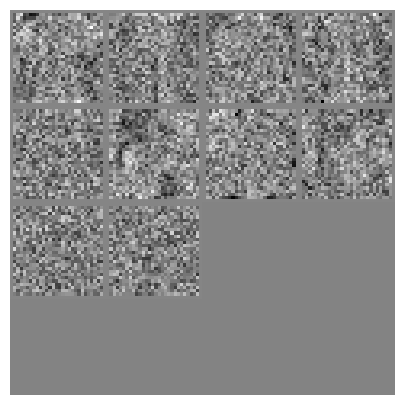

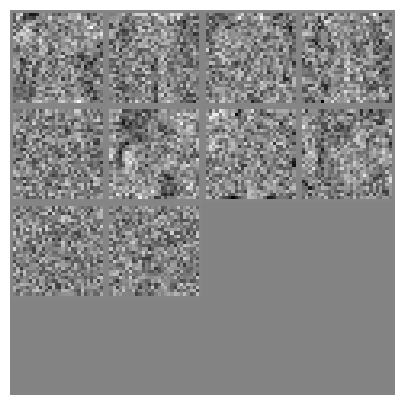

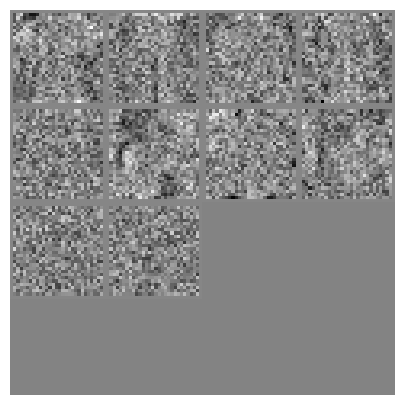

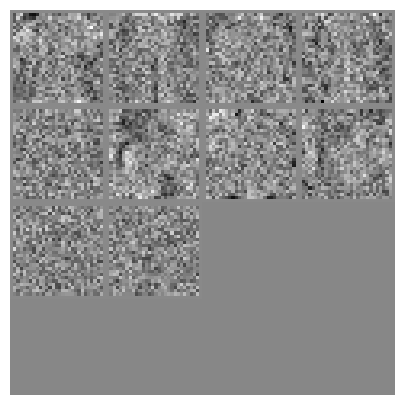

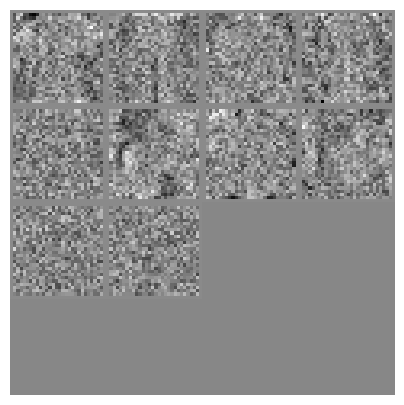

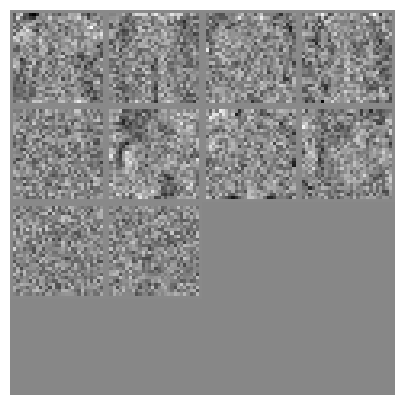

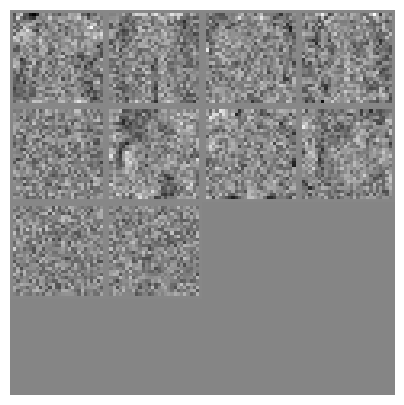

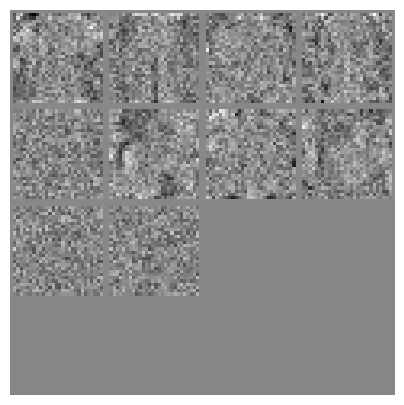

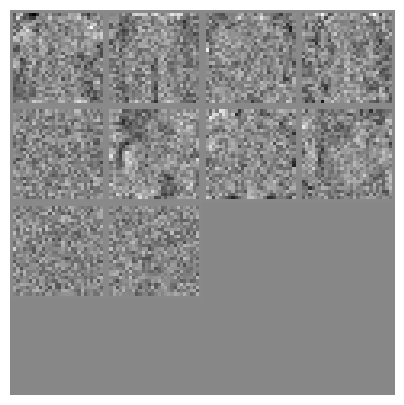

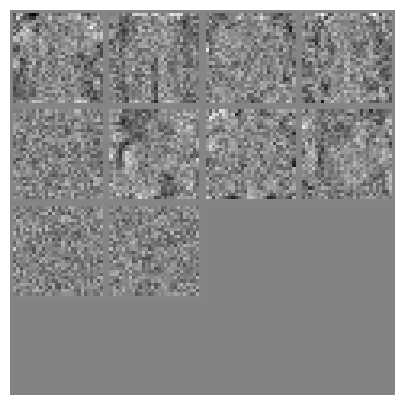

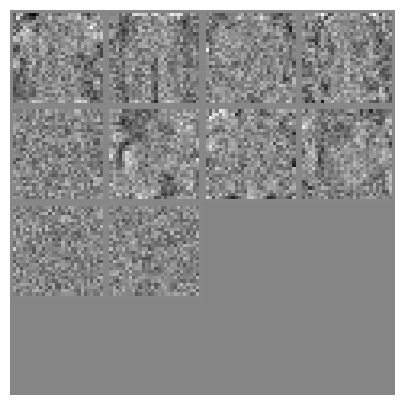

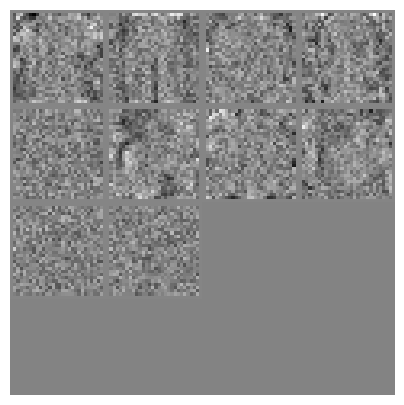

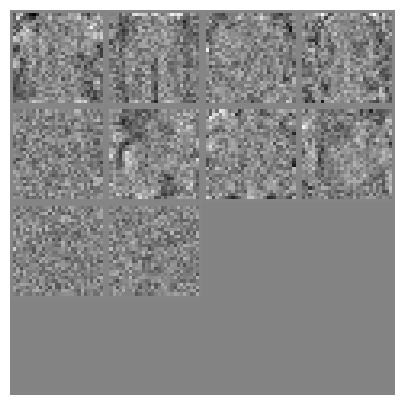

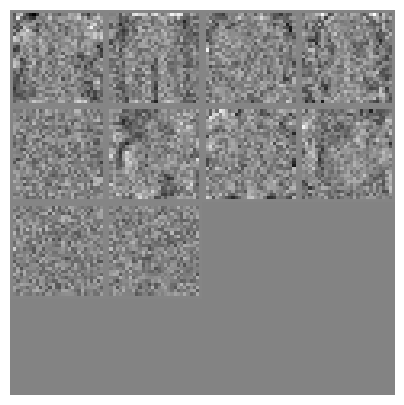

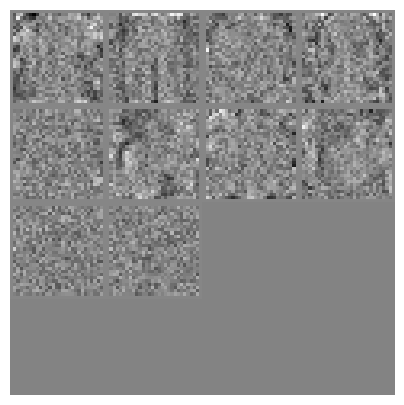

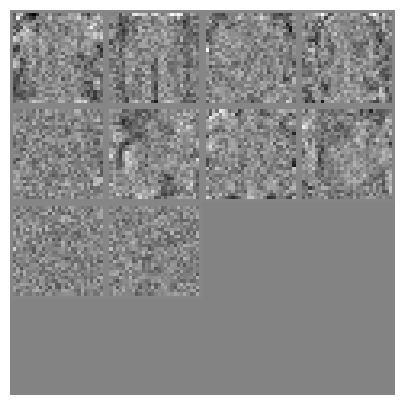

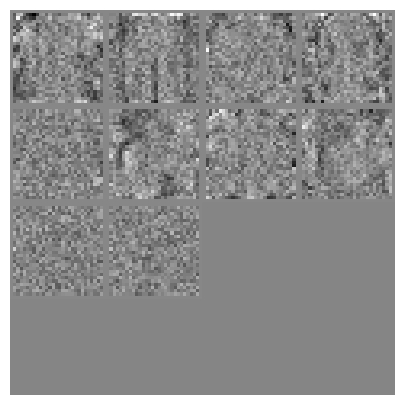

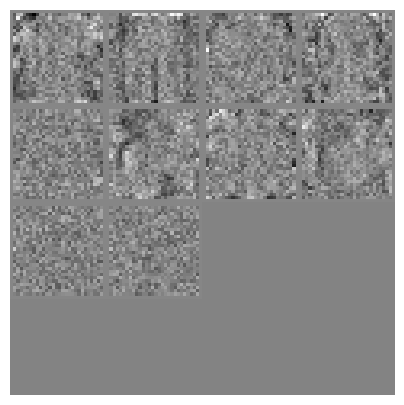

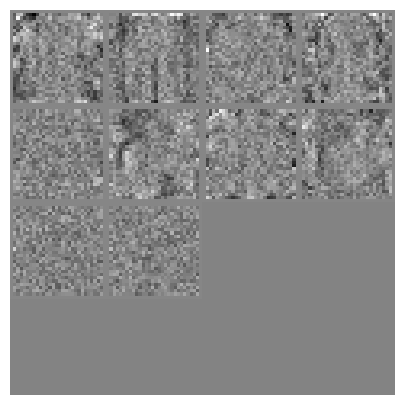

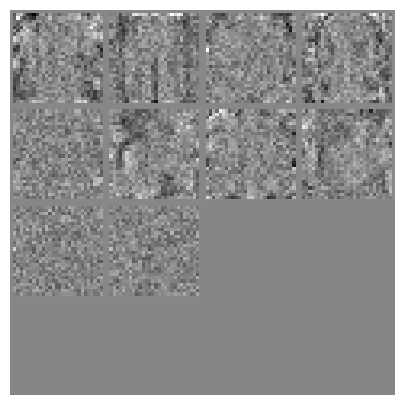

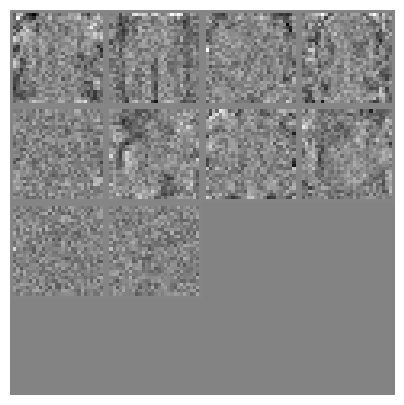

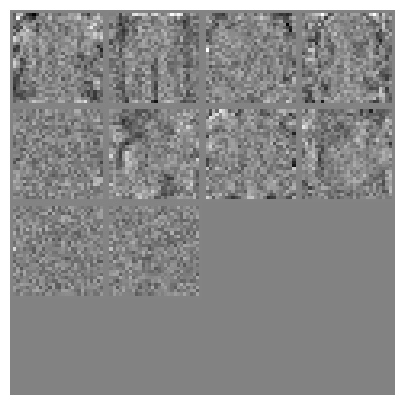

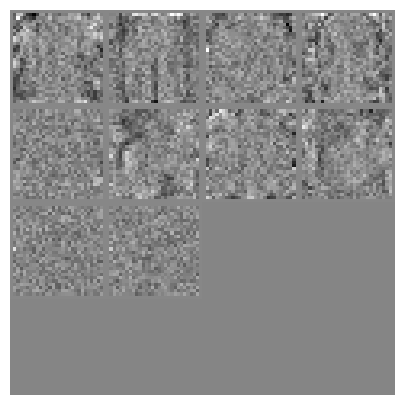

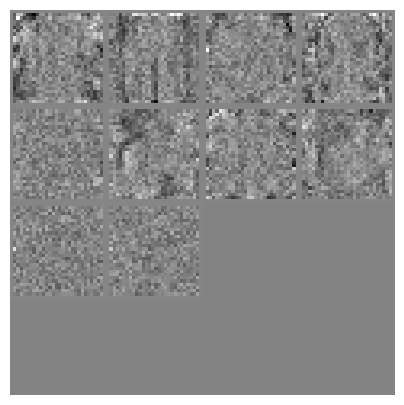

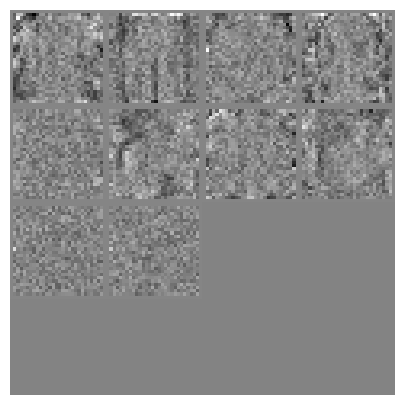

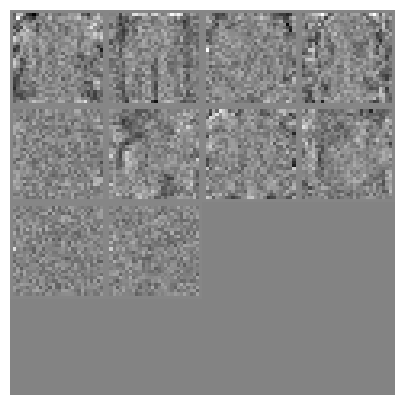

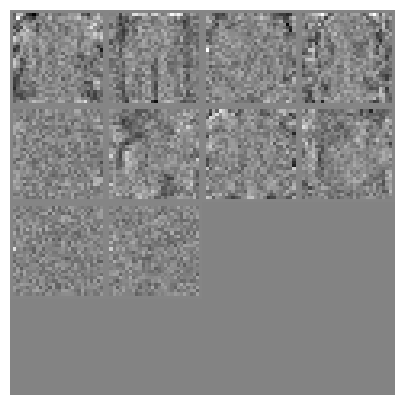

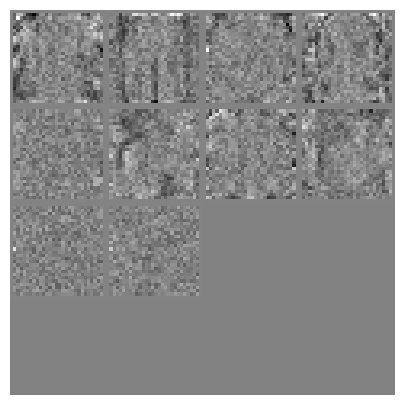

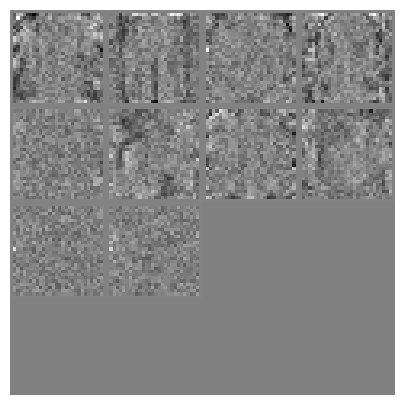

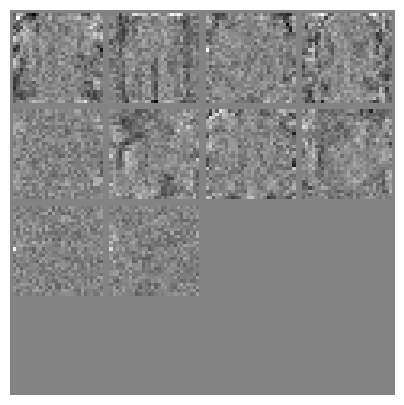

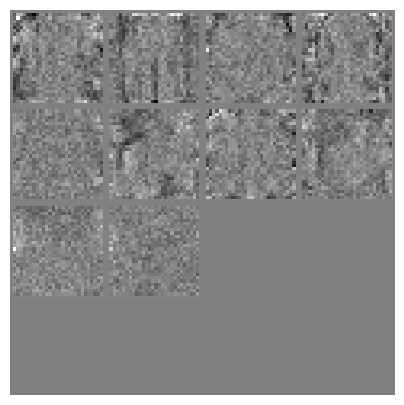

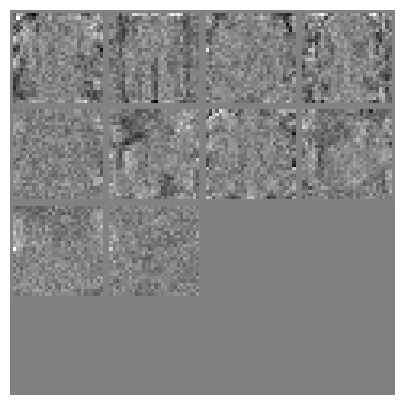

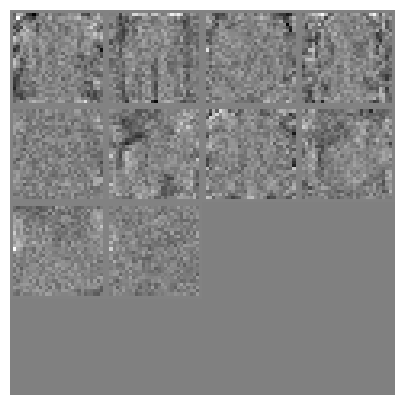

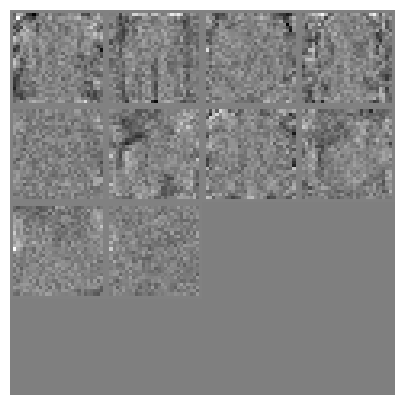

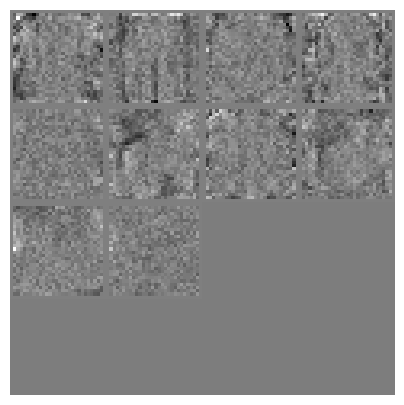

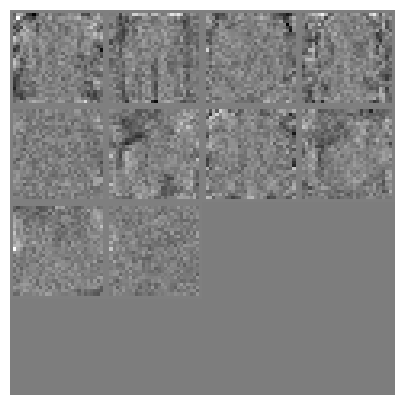

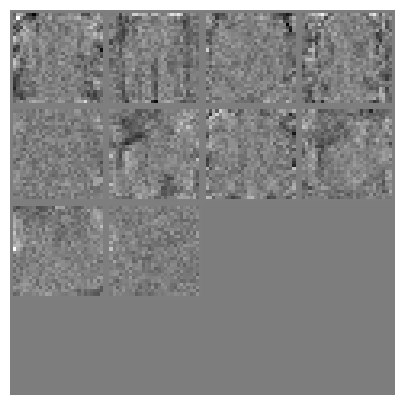

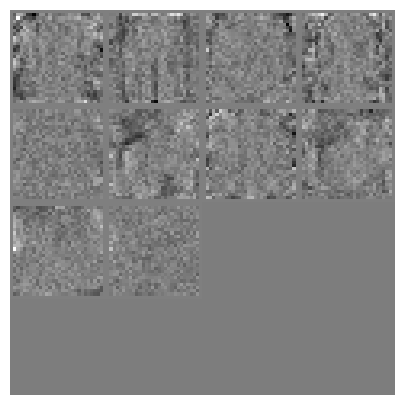

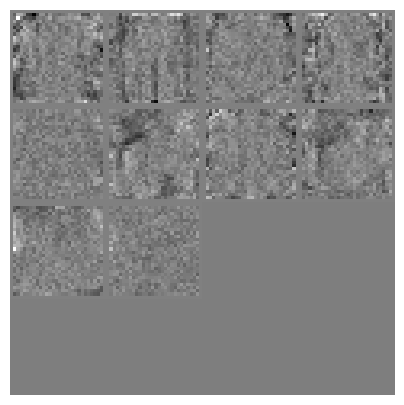

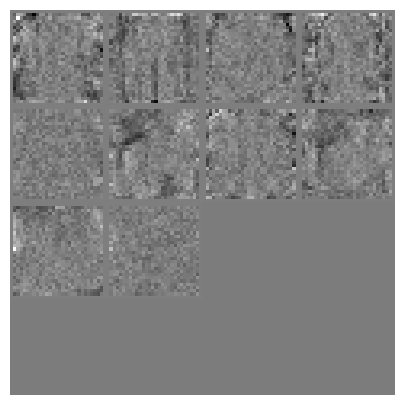

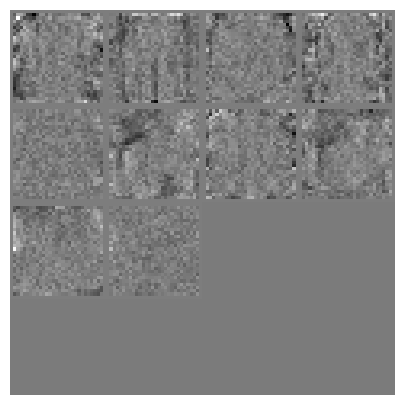

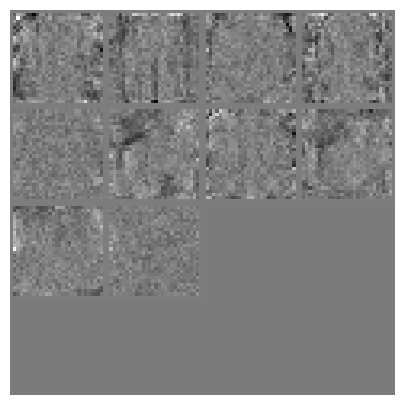

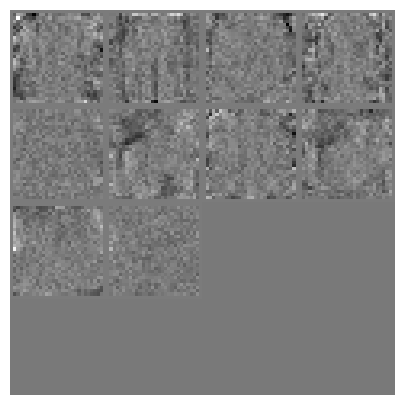

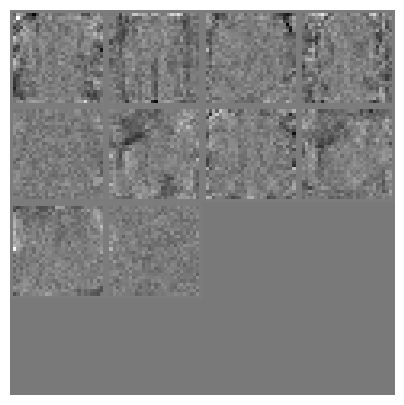

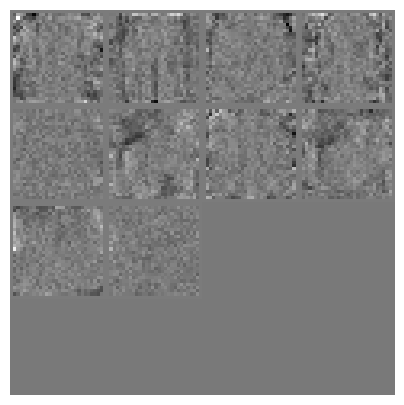

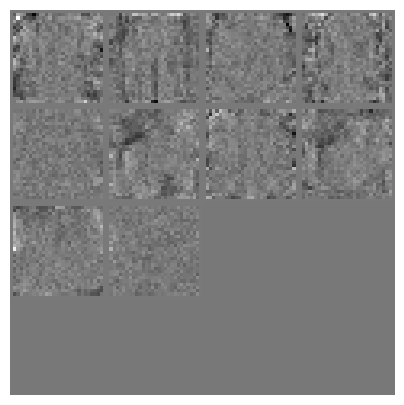

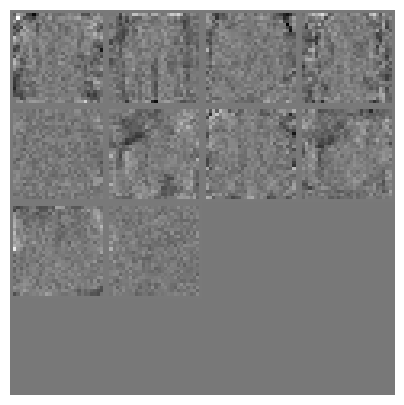

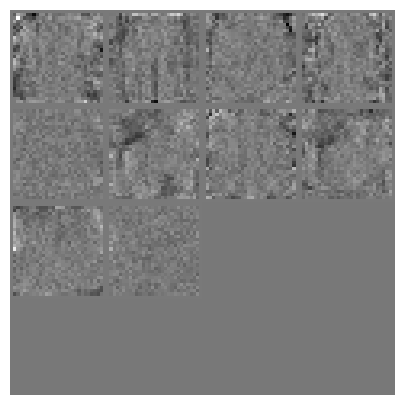

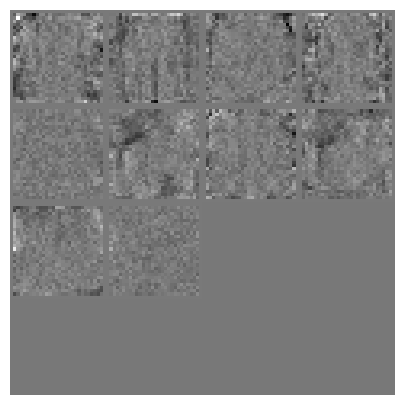

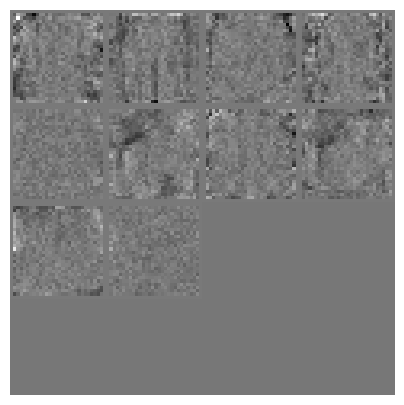

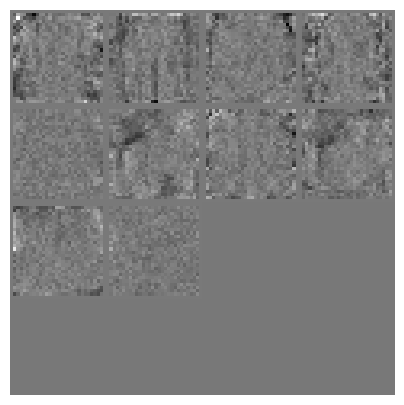

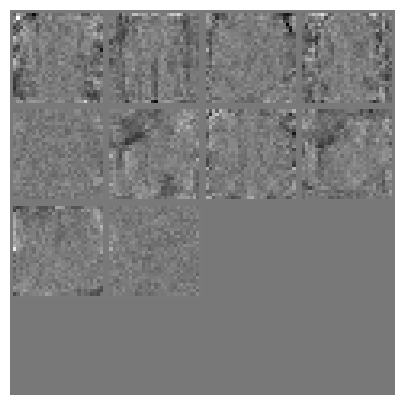

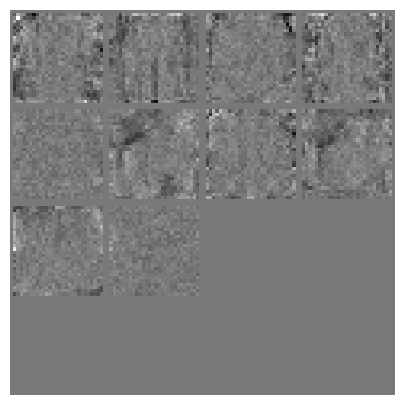

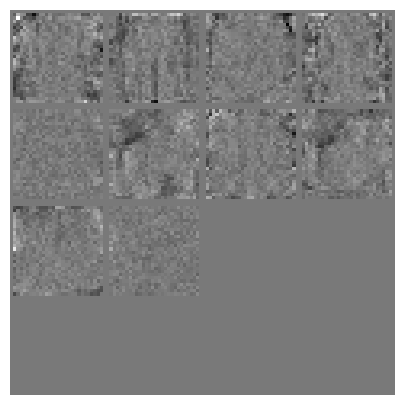

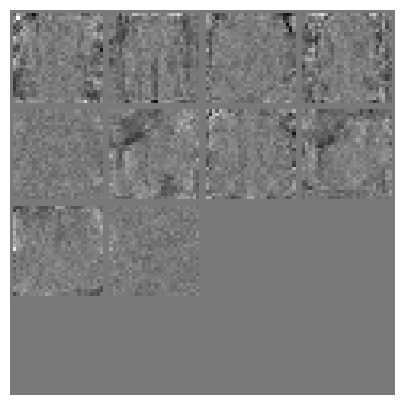

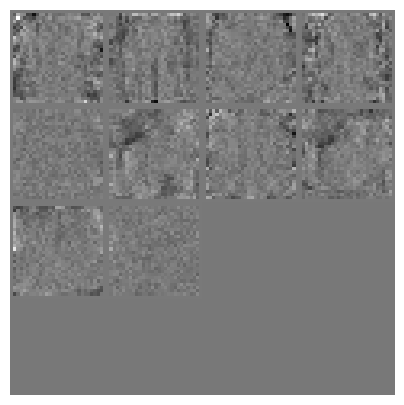

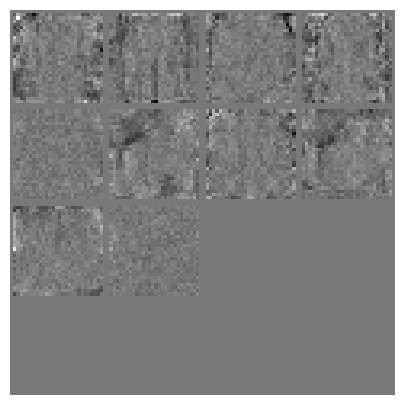

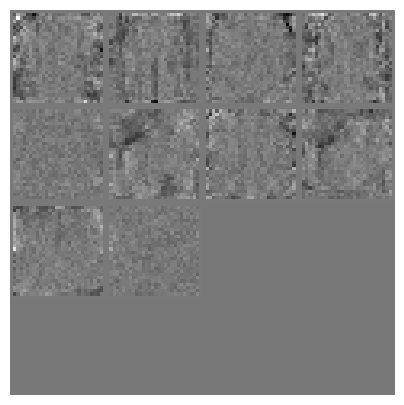

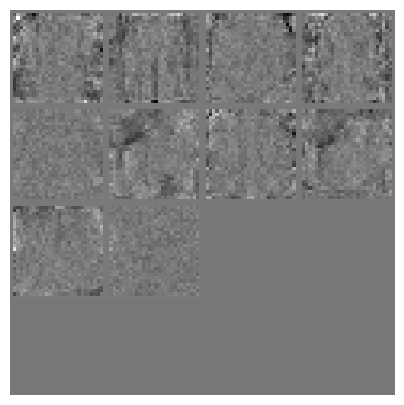

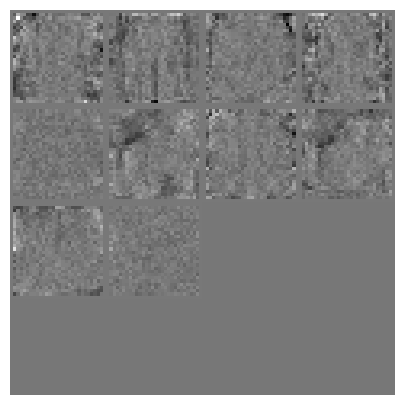

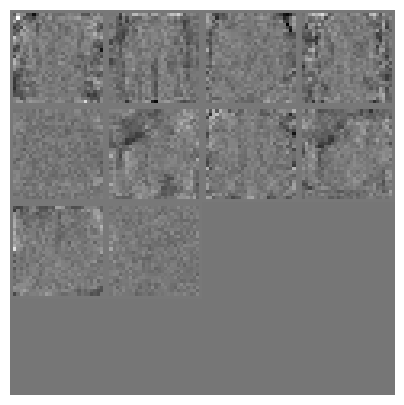

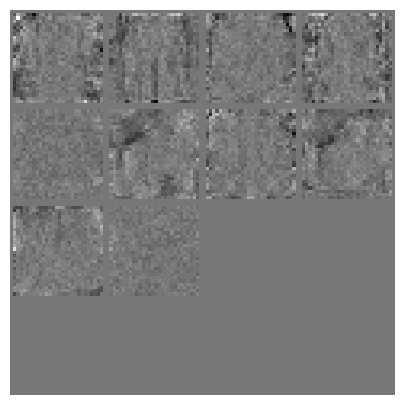

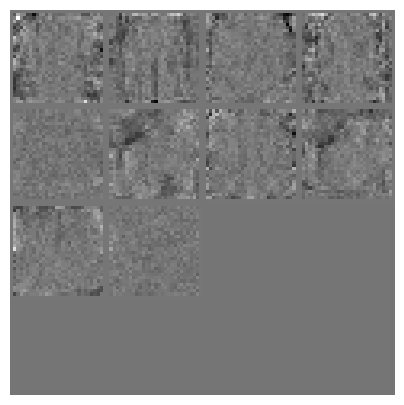

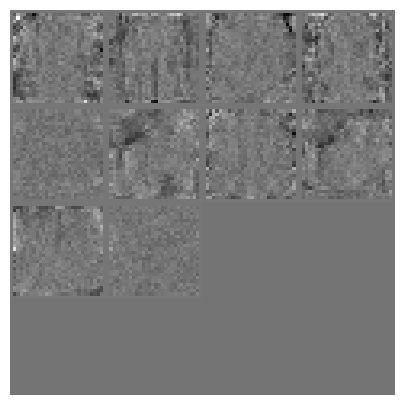

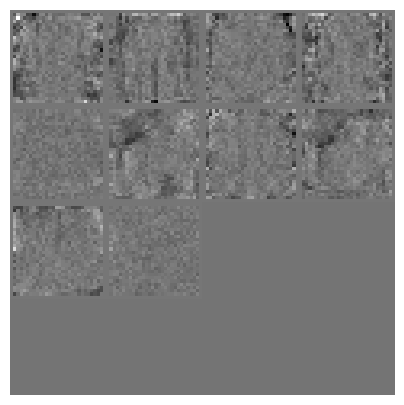

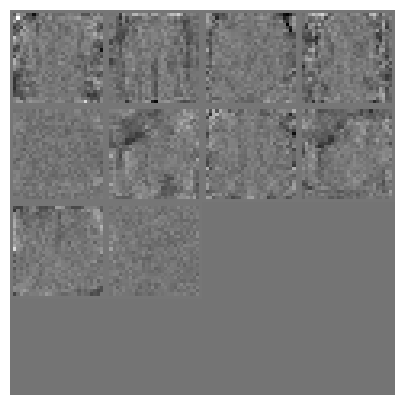

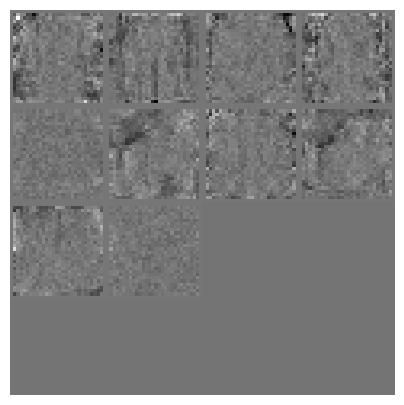

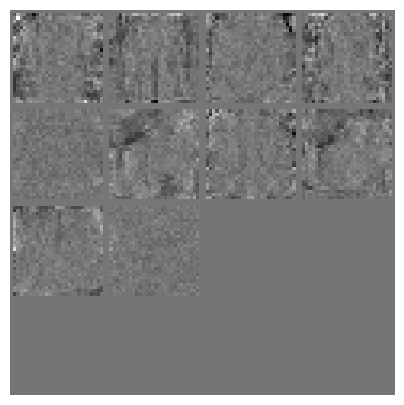

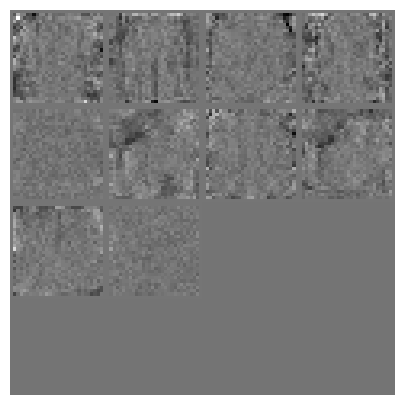

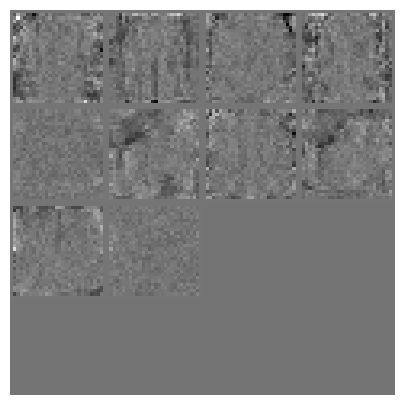

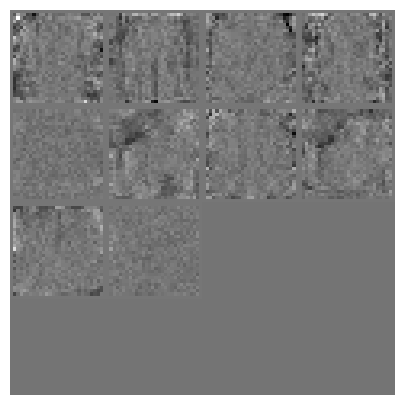

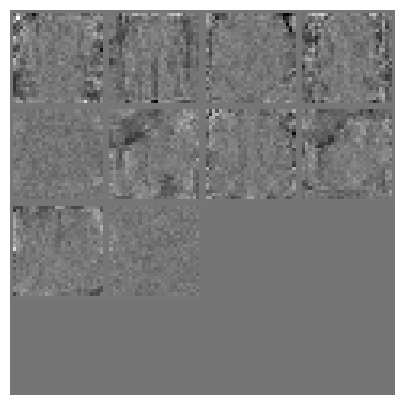

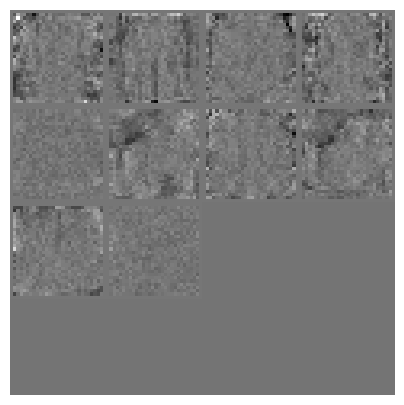

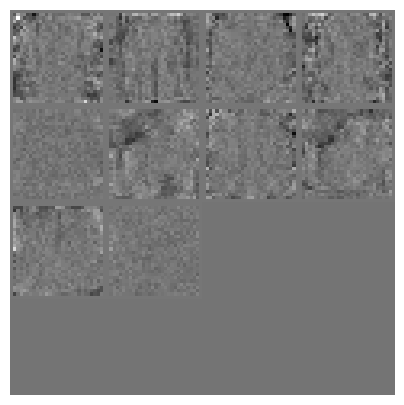

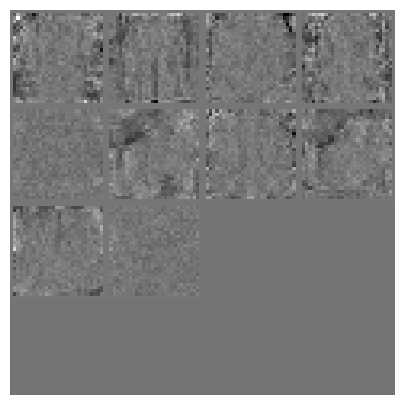

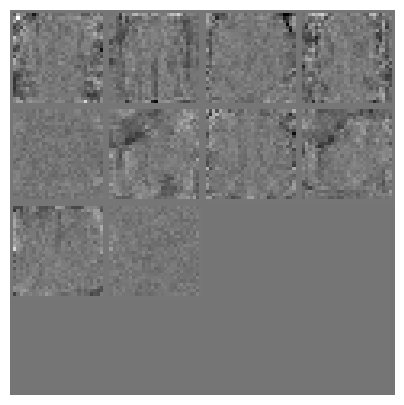

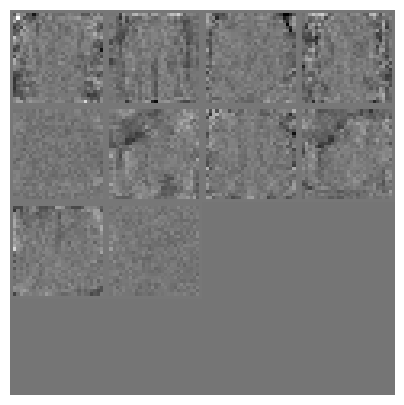

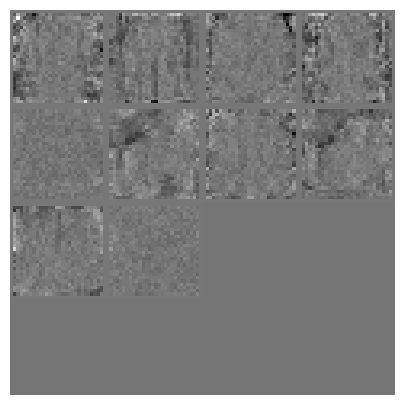

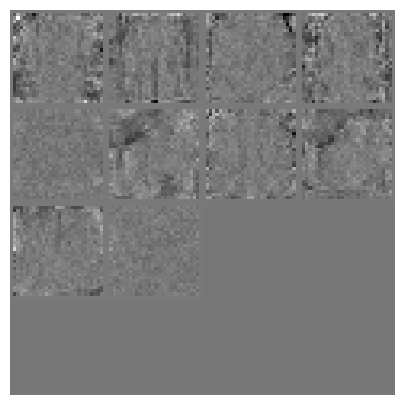

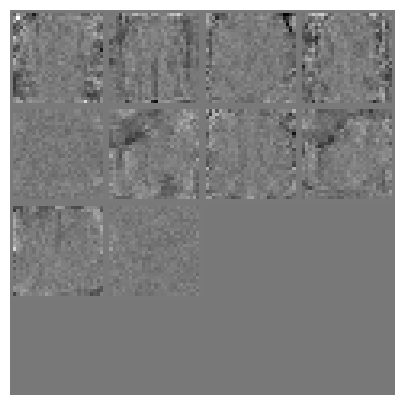

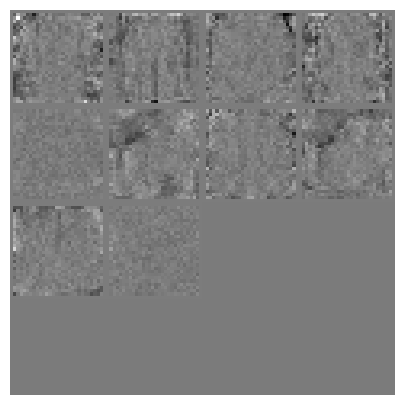

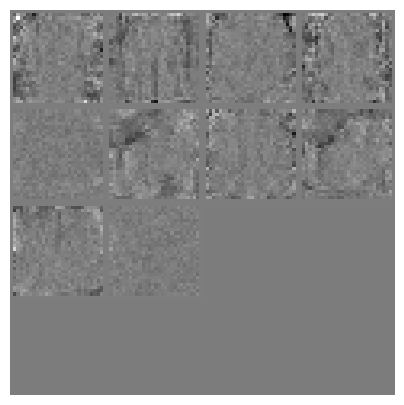

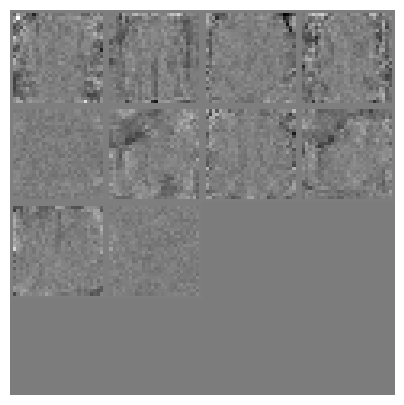

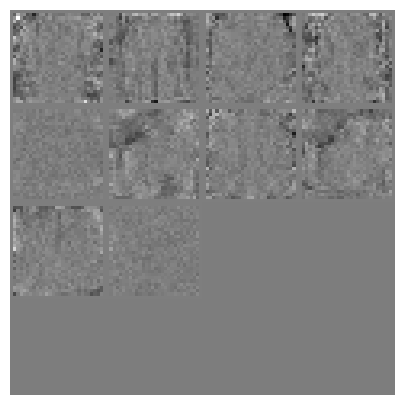

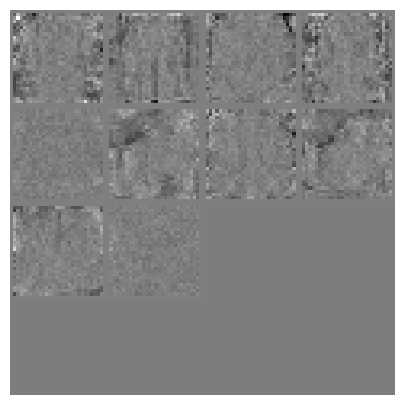

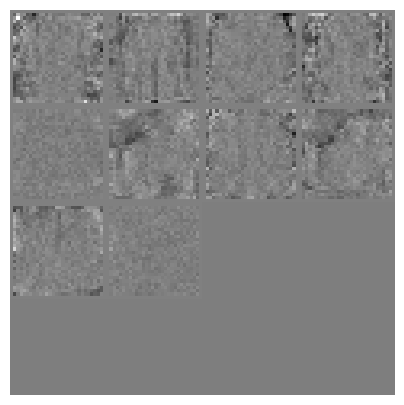

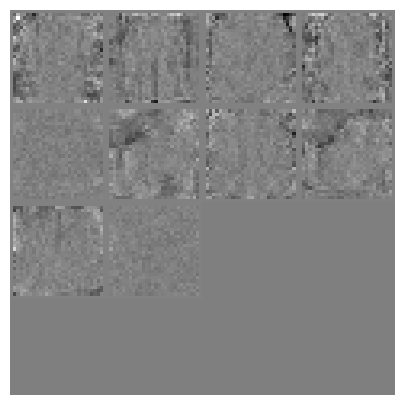

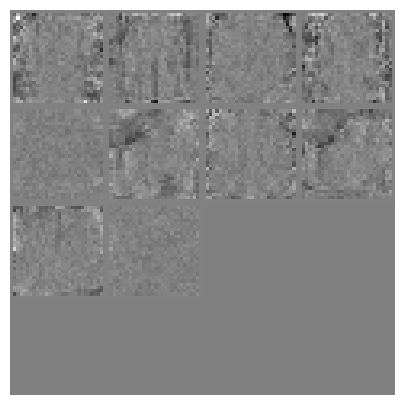

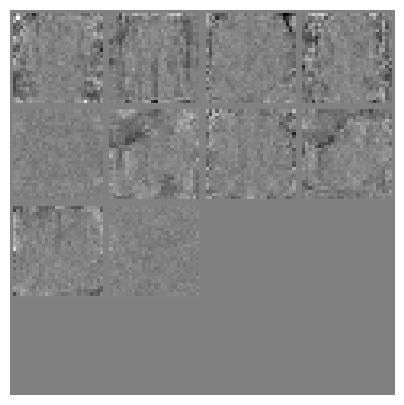

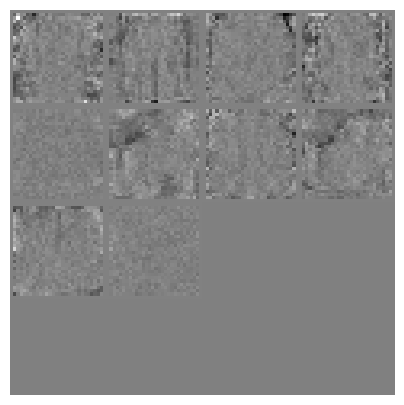

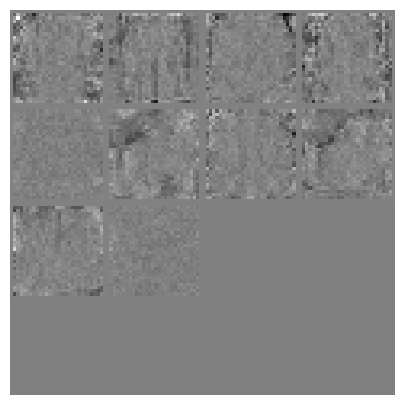

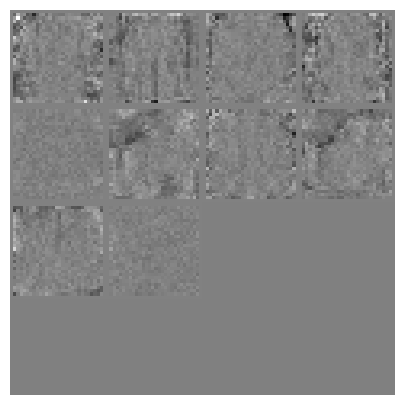

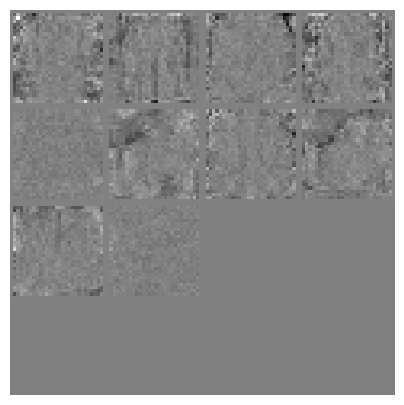

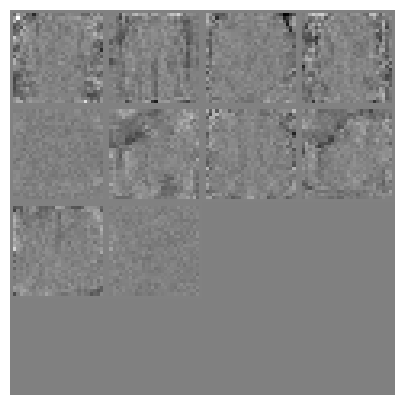

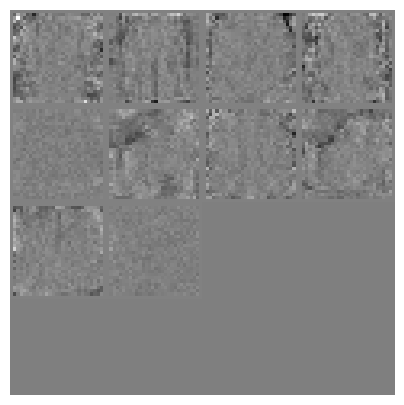

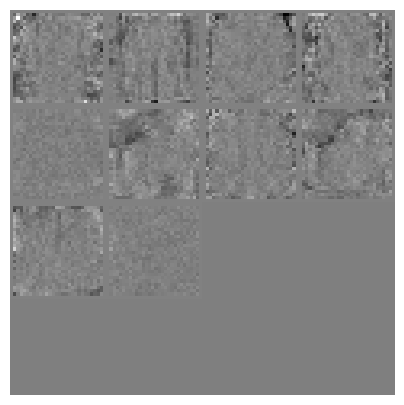

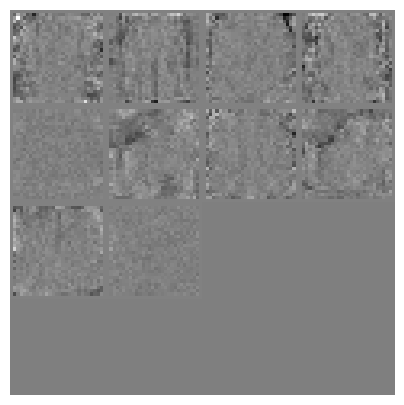

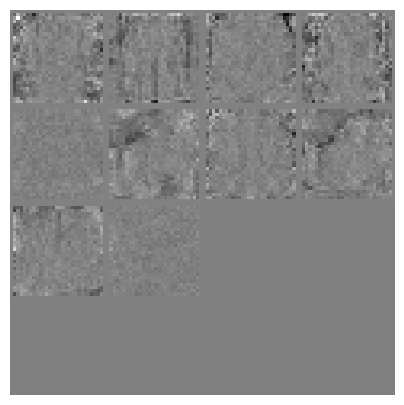

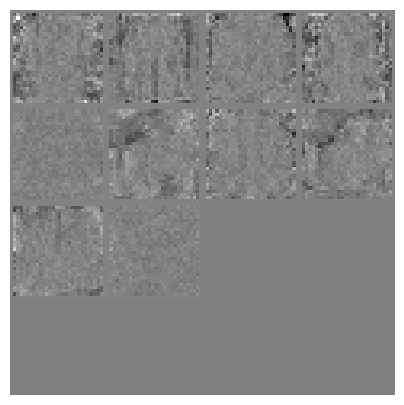

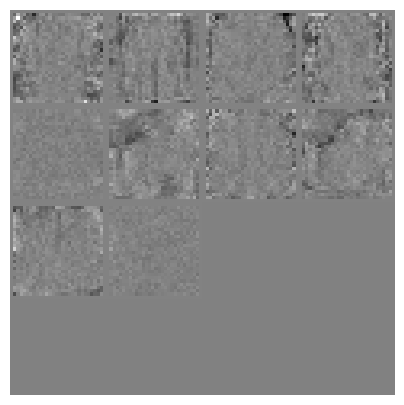

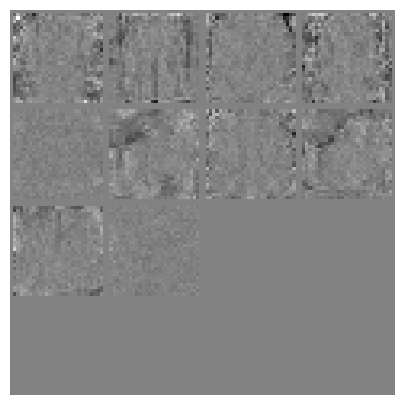

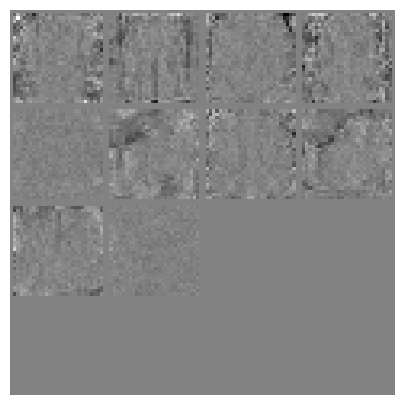

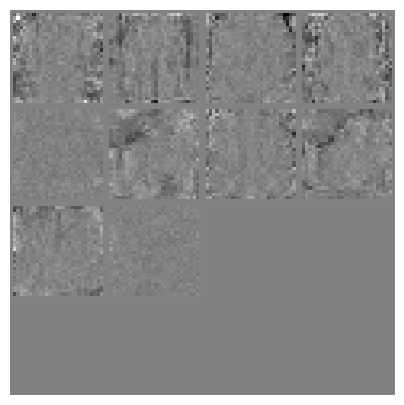

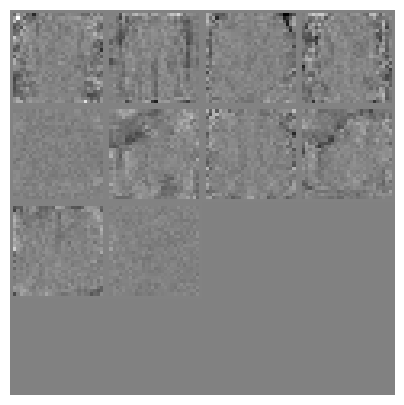

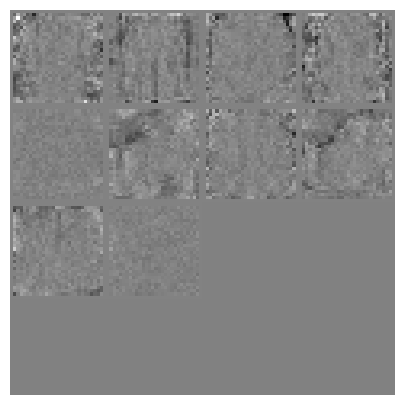

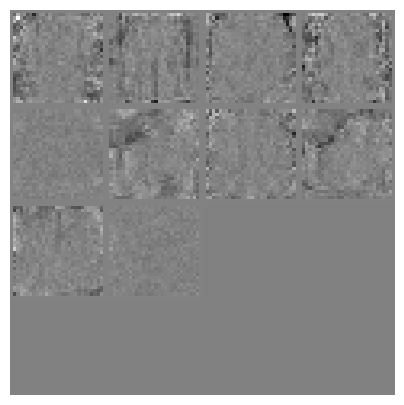

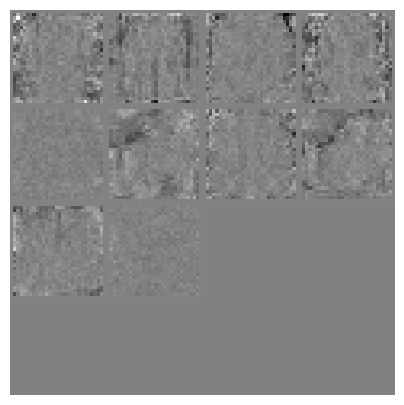

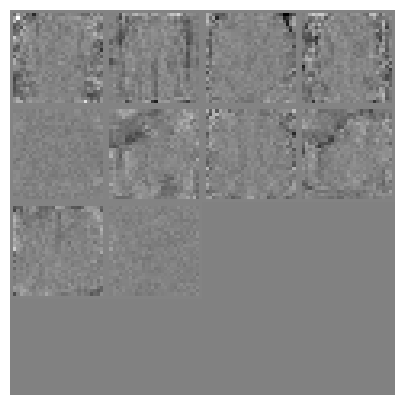

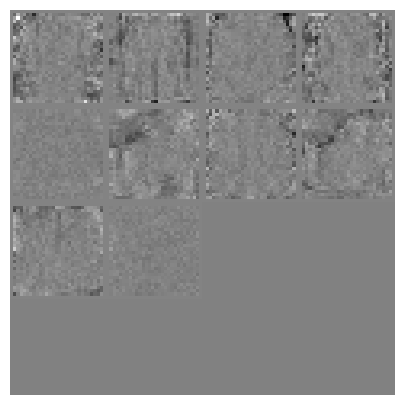

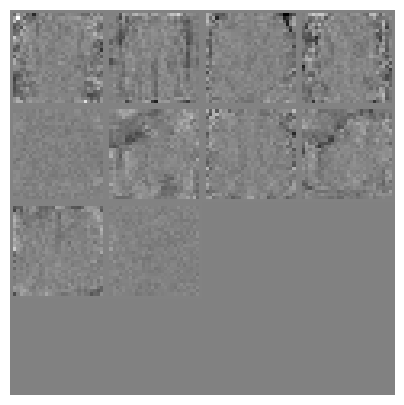

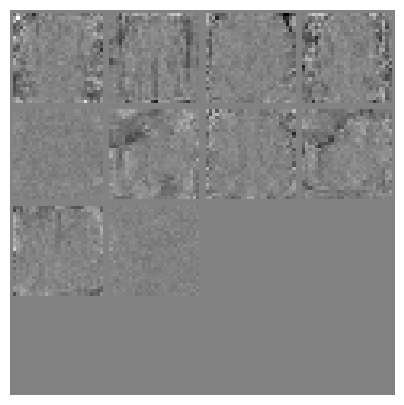

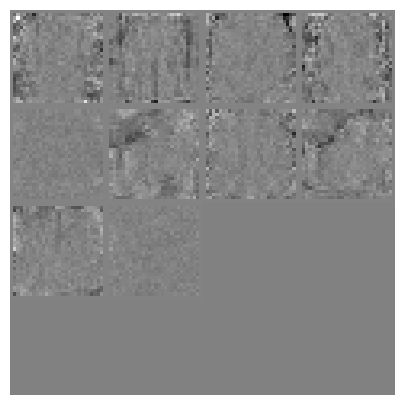

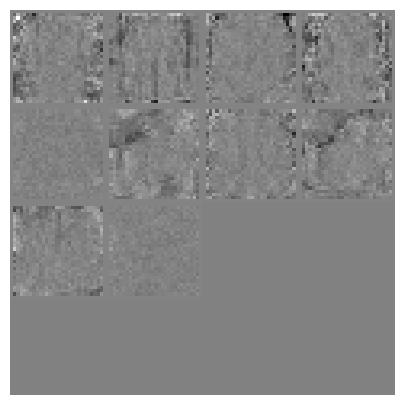

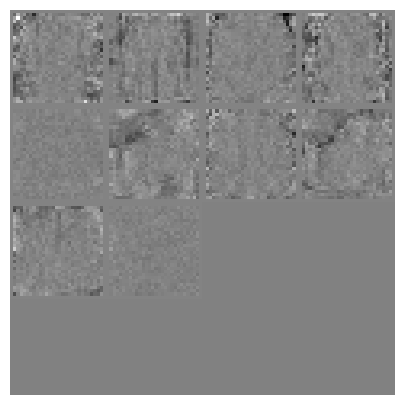

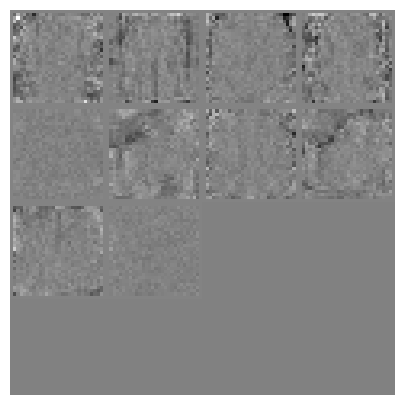

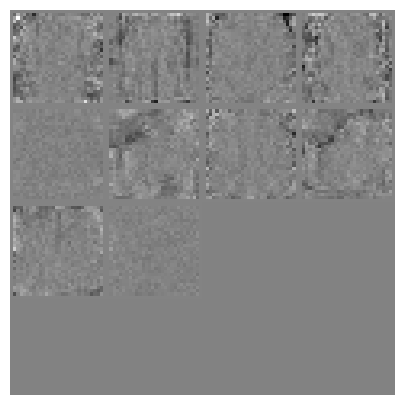

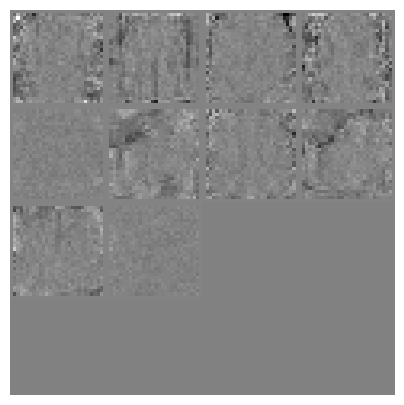

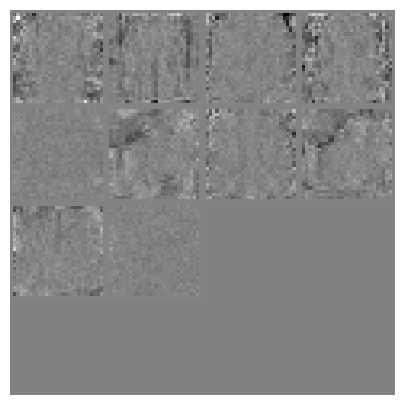

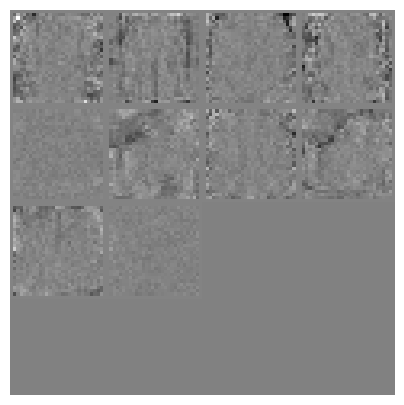

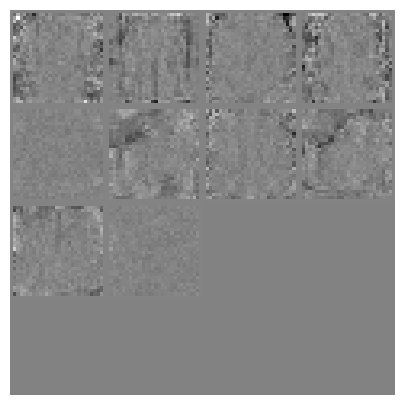

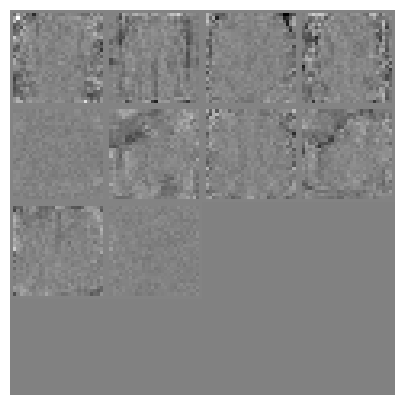

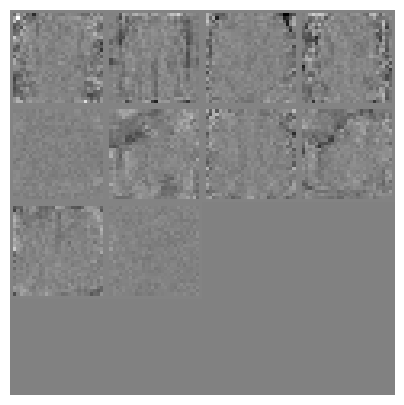

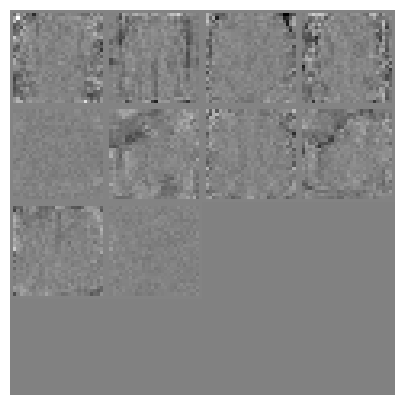

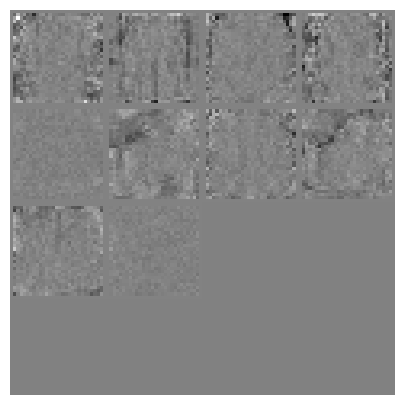

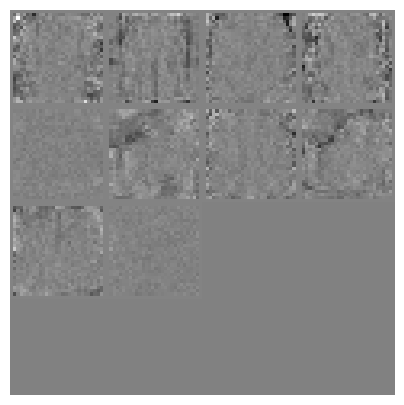

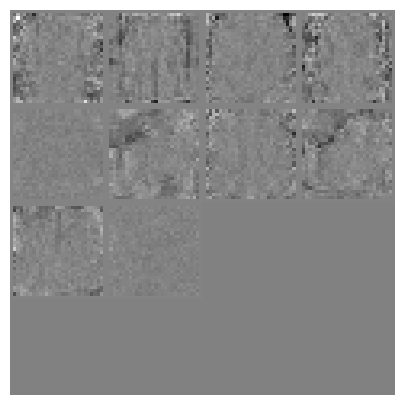

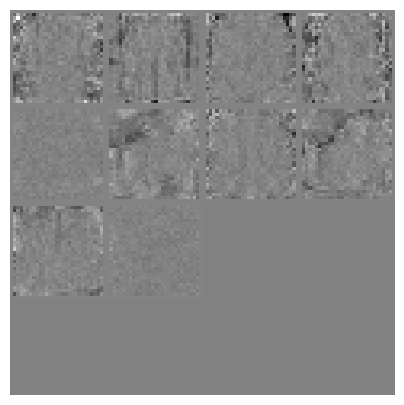

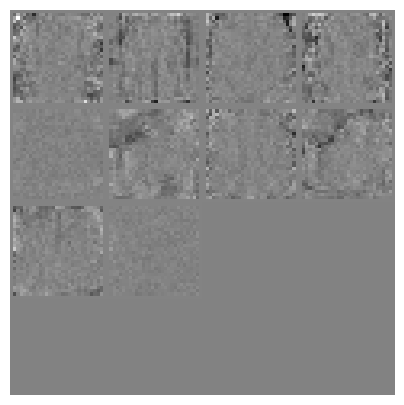

KeyboardInterrupt: ignored

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        wb.log({"loss": loss})

        make_plots()

        if i % 100 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


In [ ]:
#FC

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    return x

In [ ]:
def show_image(img):
    img = to_img(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
batch_size = 512

In [ ]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((60000, 1, 28, 28), (60000,), (10000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
X = (X + 1)/2
X_test = (X_test + 1)/2

In [ ]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

(array([5945.,  305.,  479.,  761.,  524.,  653., 1003.,  893., 1214.,
         767.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

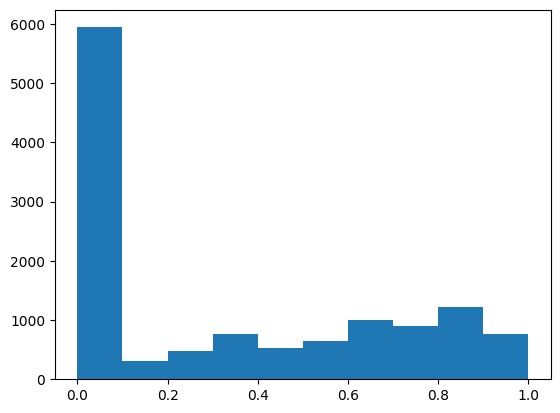

In [ ]:
plt.hist(x.flatten().cpu().numpy())

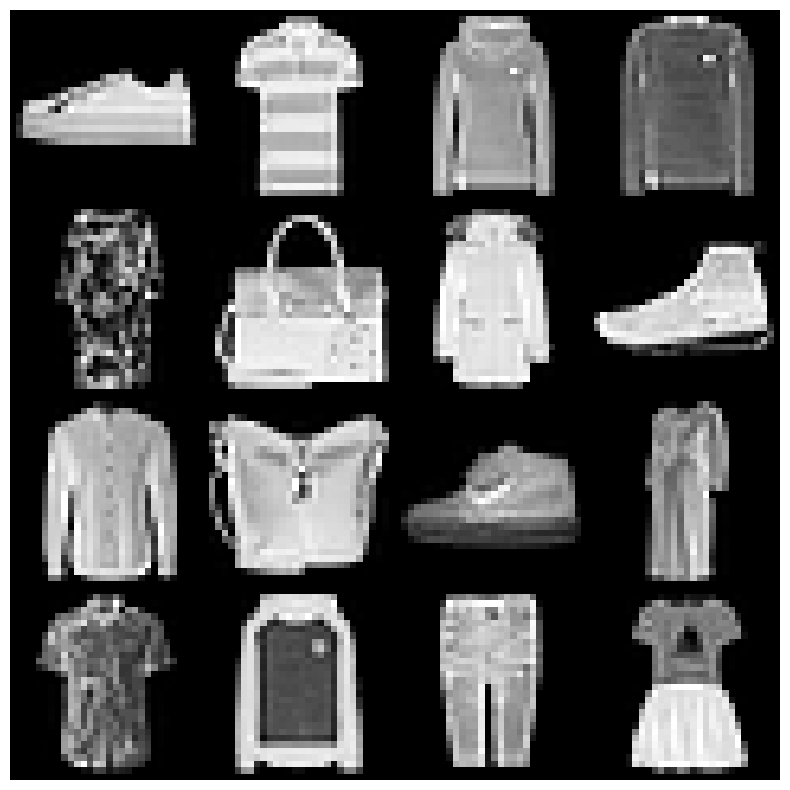

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)

def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)

In [ ]:
def Encoder(x,w):
    return x@w[0]

In [ ]:
def Decoder(x,w):
    return x@(w[0].T)

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
batch_size = 512
steps = 100000
learning_rate = 4e-3

In [ ]:
# w0 = GPU(randn_trunc((784,78)))
w0 = GPU(np.random.randn(784,10))

w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):

    x,y = get_batch('train')

    # autoencoder reconstruction
    x2 = Autoencoder(x,w)

    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 1000 == 0:
        print(loss.item())

1360.293212890625
34.99148178100586
13.886474609375
5.788851737976074
2.7004921436309814
1.478531837463379
1.1838693618774414
0.7236608266830444
0.41502705216407776
0.23175647854804993
0.2606799900531769
0.19860652089118958
0.28624075651168823
0.27958351373672485
0.23449519276618958
0.18178151547908783
0.17497560381889343
0.035984259098768234
0.03130031004548073
0.02594936639070511
0.03082033060491085
0.026253648102283478
0.025878852233290672
0.027961254119873047
0.027327902615070343
0.026648038998246193
0.026574470102787018
0.029863089323043823
0.02526310458779335
0.0295164305716753
0.02279984951019287
0.03487902507185936
0.023192407563328743
0.028867527842521667
0.029026901349425316
0.024215538054704666
0.026673119515180588
0.024976907297968864
0.029127439484000206
0.025260457769036293
0.026869721710681915
0.022887853905558586
0.021508371457457542
0.026608845219016075
0.0210118368268013
0.026652514934539795
0.0271968524903059
0.023770127445459366
0.02437587082386017


KeyboardInterrupt: ignored

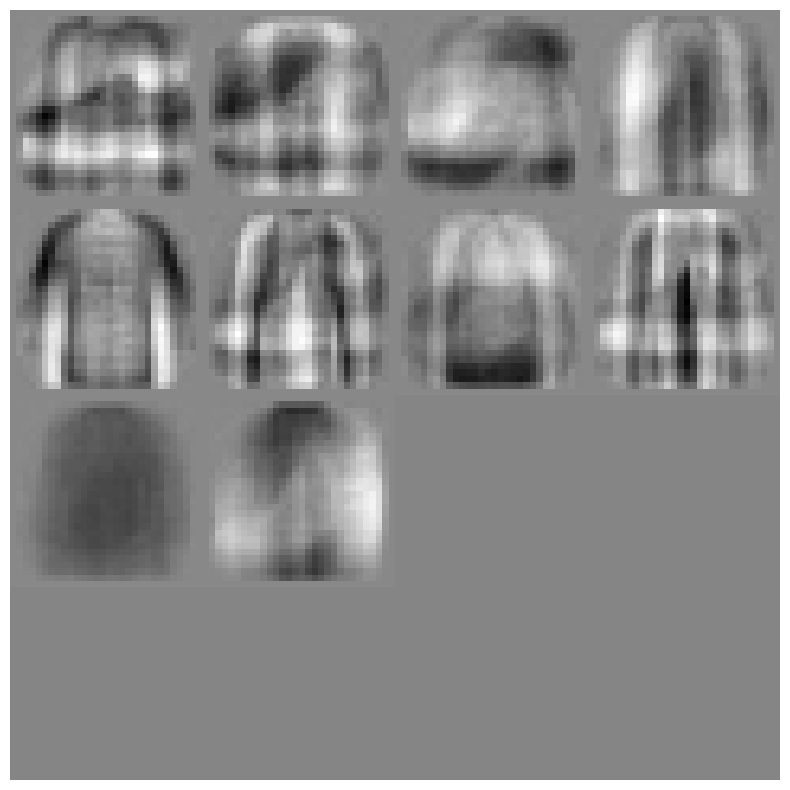

In [ ]:
montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
78/784

0.09948979591836735

In [ ]:
batch_size = 16

In [ ]:
x,y = get_batch('test')

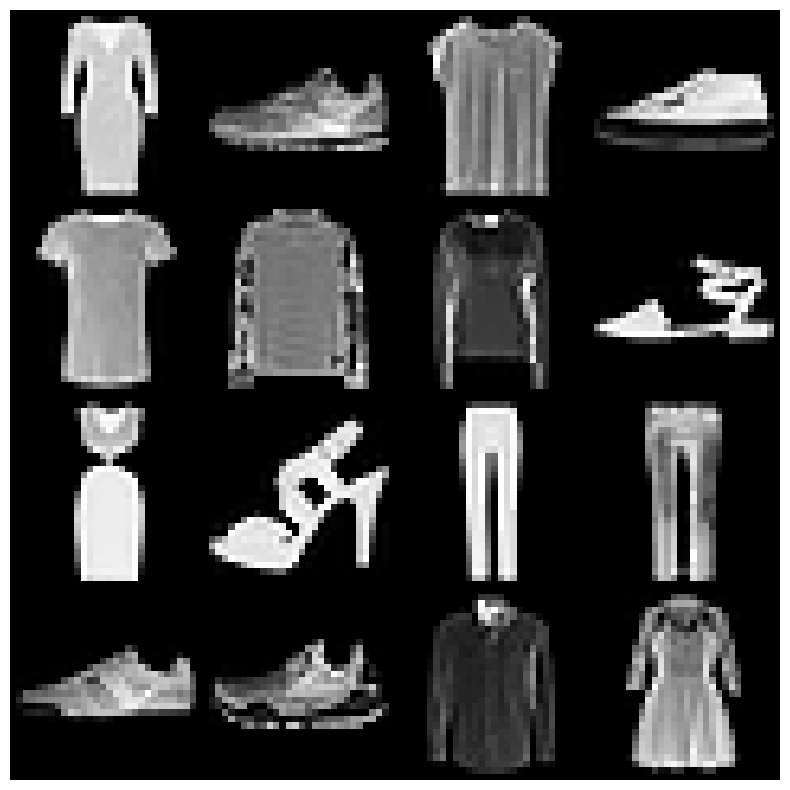

In [ ]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy())

In [ ]:
x2 = Autoencoder(x,w)

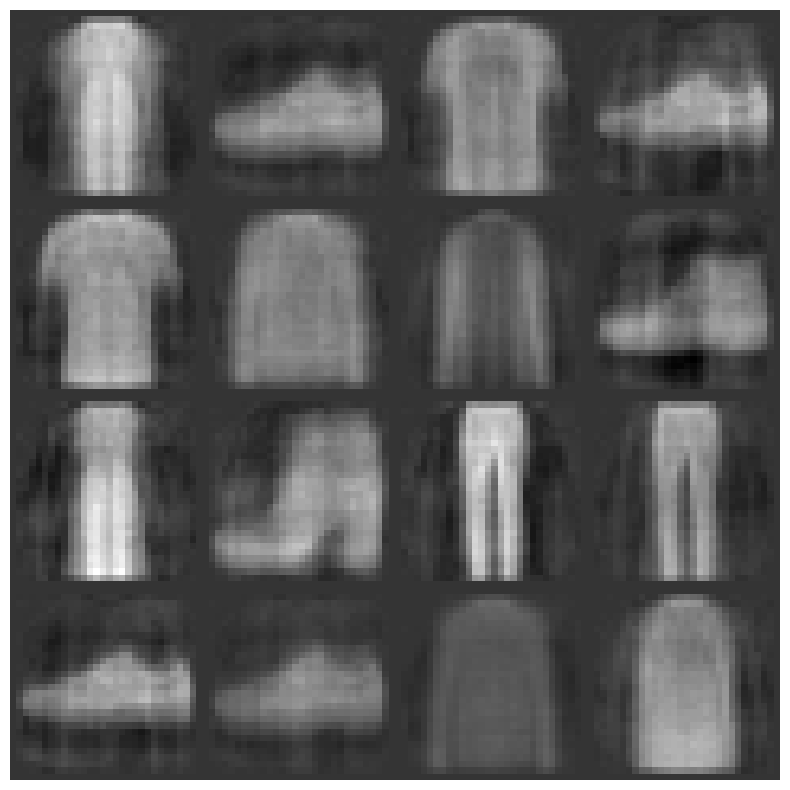

In [ ]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

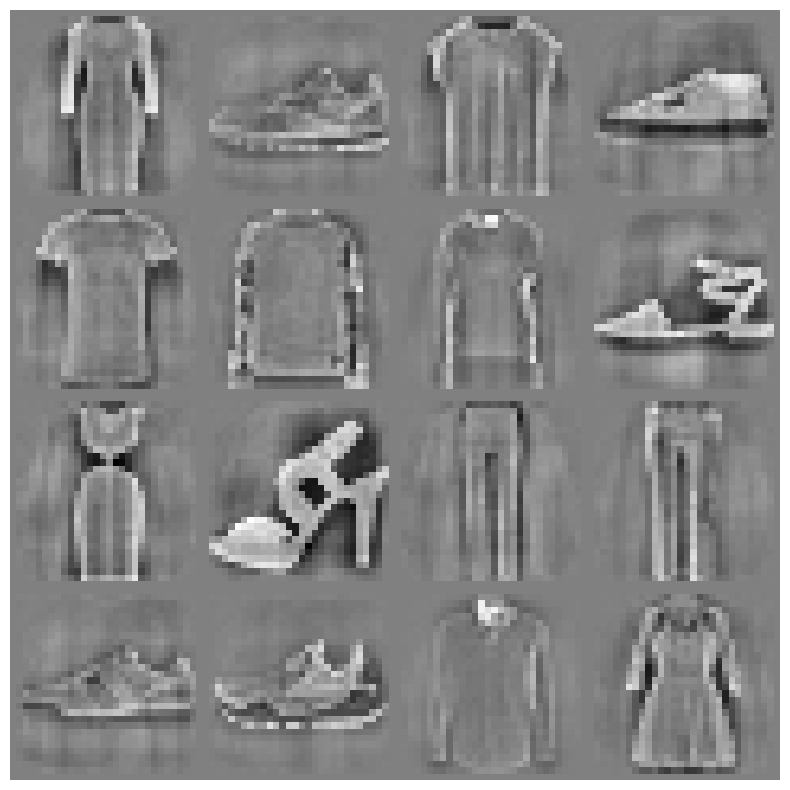

In [ ]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy())

# Convolutional Autoencoder

In [ ]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

NameError: ignored

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
# X = (X - 0.5)/0.5
# X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-0fk_miz7
  Running command git clone --filter=blob:none --quiet https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-0fk_miz7
  Resolved https://github.com/williamedwardhahn/mpcr to commit 8d265643f3b8b6e0ed96c7fb98da047fdcd3bb51
  Preparing metadata (setup.py) ... done
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7663 sha256=6db8507d66fa2a9adbaa639263d7d0f5f2fe044aa2b3c1a848cadfeb338ecc63
  Stored in directory: /tmp/pip-ephem-wheel-cache-ryvzovo0/wheels/ea/02/e0/f5ddcc5cf9849058373052ecb328f3e9843fac4141b8491e0f
Successfully built ImportMPCR


ImportError: ignored

In [ ]:
def get_batch(mode):
    b = 512
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
X.shape

torch.Size([6000, 1, 28, 28])

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

NameError: ignored

In [ ]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x

In [ ]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

for i in range(num_steps):

    x_real,y = get_batch('train')

    x_fake = Autoencoder(x_real,w)

    loss = torch.mean((x_fake - x_real)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0: print(loss.item())

1.1891613006591797
0.06710696965456009
0.049508508294820786
0.043206993490457535
0.0422360934317112
0.039223942905664444
0.03789034113287926
0.036657147109508514
0.03773913159966469
0.03467433899641037


In [ ]:
image_batch,y = get_batch('test')

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)

tensor(0.0430, device='cuda:0', grad_fn=<MeanBackward0>)

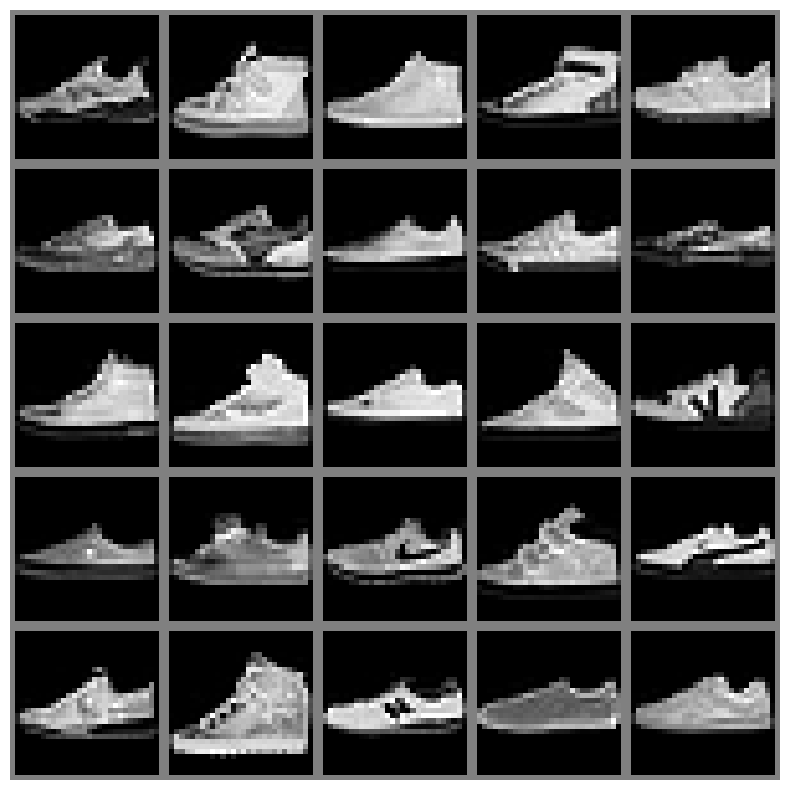

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

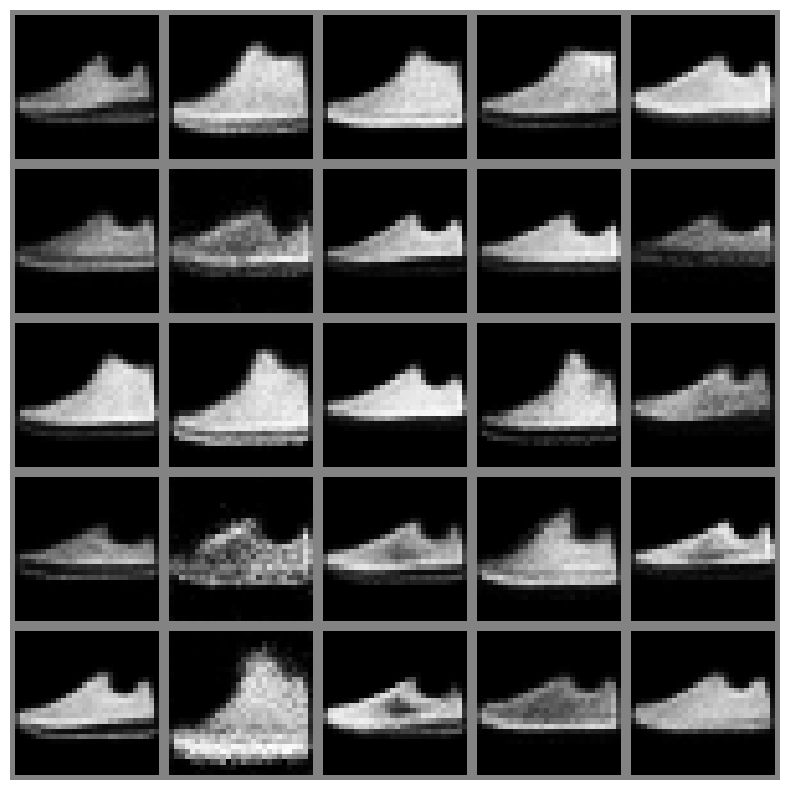

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



Convolutional Transpose

In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 512

In [ ]:
#MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([512, 1, 28, 28])

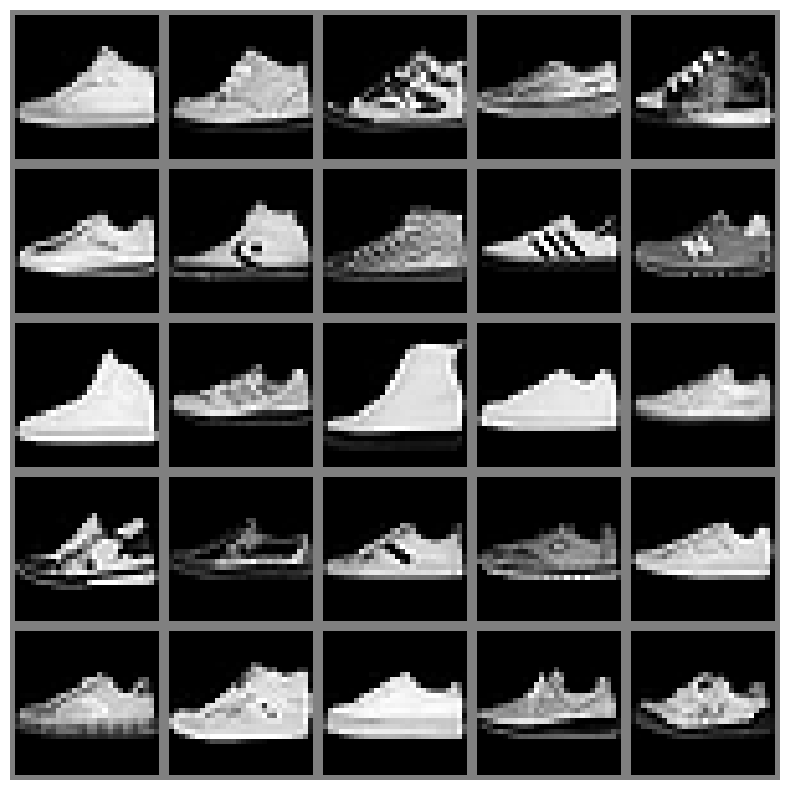

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
b = 512

In [ ]:
batch_size = b

In [ ]:
batch_size

512

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = Variable(torch.ones(batch_size, 1).cuda())
fake_labels = Variable(torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = Variable(torch.randn(steps,batch_size,latent_size).cuda())
z2 = Variable(torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
for i in range(steps):

    images,y = get_batch('train')

    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()


    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()


    if i % 200 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

In [ ]:
z1[np.random.randint(steps)].shape

torch.Size([512, 64])

In [ ]:
noise = GPU_data(torch.randn(1,64))

In [ ]:
output = G(noise,w)

In [ ]:
output.shape

torch.Size([1, 1, 28, 28])

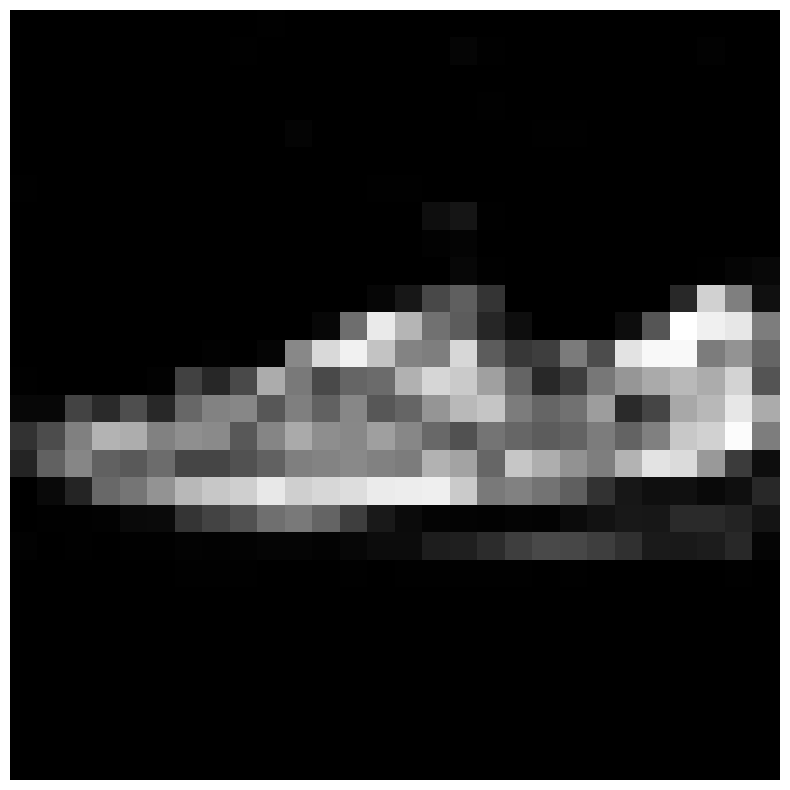

In [ ]:
plot(output[0,0])